In [14]:
import h5py
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('./dune.mplstyle')
from utils import *
from PNS_peak_analysis import PNS_peak_analysis
from pathlib import Path

NEUTRON_MASS = 939.565 # MeV/c2

tpc_dist = 3.07;
x_bound = 63.931;
y_bound = 62.076;
z_bound = 64.3163;

In [15]:
E_pgammas = []
nhits_gamma = []
 
E_pgamma_hit = []
E_hit_sum = [] 

nhits_peak_gamma = []
E_pgamma_hit_peak = []
E_hit_sum_peak = [] 
E_hit_peak = []

In [16]:

# Specify your directory
directory = Path('/global/cfs/cdirs/dune/users/lmlepin/2x2_neutron_prod/DTG_prod_v2/FLOW')

# Iterate over all files
for file in directory.iterdir():
    if file.is_file():
        print(f"Openning file: {file.name}")
        f = h5py.File(file.resolve(), 'r')
        temp_dict = PNS_peak_analysis(f)
        E_pgammas.extend(temp_dict["E_truth_gamma"])
        E_pgamma_hit.extend(temp_dict["E_truth_gamma_hit"])
        E_hit_sum.extend(temp_dict["E_hit_sum"])
        nhits_gamma.extend(temp_dict["n_gamma_hits"])
        nhits_peak_gamma.extend(temp_dict["n_peak_hits"])
        E_pgamma_hit_peak.extend(temp_dict["E_gamma_peak"])
        E_hit_sum_peak.extend(temp_dict["E_hit_sum_peak"])
        E_hit_peak.extend(temp_dict["E_hit_peak"])



Openning file: 2x2_MyQGSP_BERT_ArHP_DTG_DTG_prod_v2_1.FLOW.hdf5
Event ID of 3 hits event: 1008
63.89817789940711 38.79750061035156 18.202699661254883
49.97711225502172 39.24089813232422 18.202699661254883
39.96735519191434 39.68429946899414 21.749900817871094
0.6399397678980061
Event ID of 3 hits event: 1024
3.7882988136864446 14.410499572753906 38.599098205566406
10.525328288377537 13.967100143432617 38.15570068359375
11.14794475641771 14.410499572753906 38.599098205566406
0.5765667870122884
Event ID of 3 hits event: 1029
63.163809757616136 -37.46730041503906 54.561500549316406
63.11591618315151 -37.46730041503906 55.00490188598633
49.40238936144618 -43.23149871826172 51.01430130004883
0.5131938061265705
Event ID of 3 hits event: 1031
59.41214642455356 21.948299407958984 25.297100067138672
56.809928878642076 -7.316100120544434 -15.5423002243042
56.36292218363887 -7.316100120544434 -15.5423002243042
0.639939767898007
Event ID of 3 hits event: 1041
17.884974231108803 5.099100112915039 -

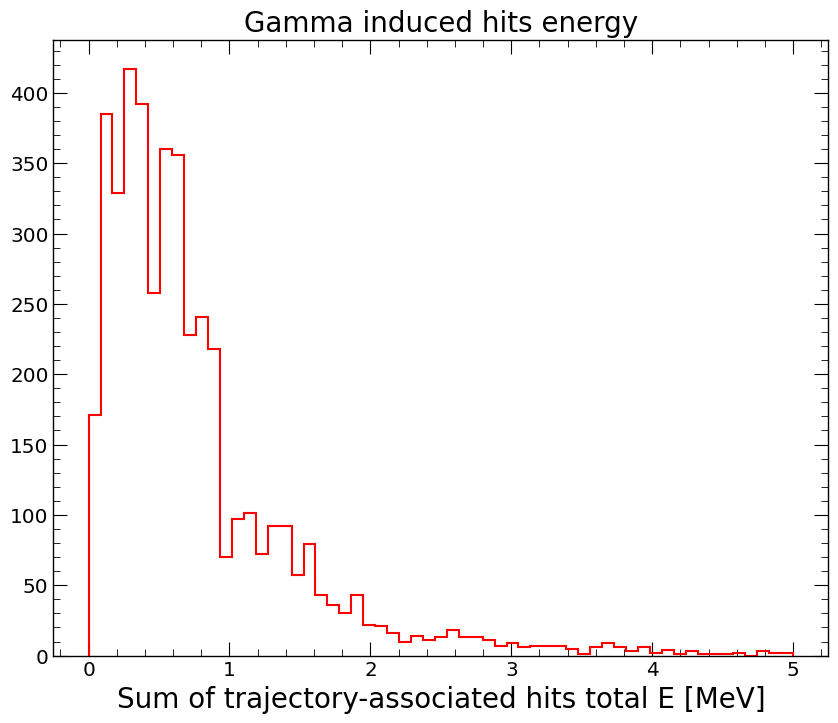

In [17]:
binning = np.linspace(0.,5.,60)
plt.figure(figsize=(10,8),dpi=100)
plt.hist(E_hit_sum, bins = binning, histtype='step',color='red')
plt.title("Gamma induced hits energy",fontsize=20)
plt.xlabel("Sum of trajectory-associated hits total E [MeV]",fontsize=20)
plt.show()

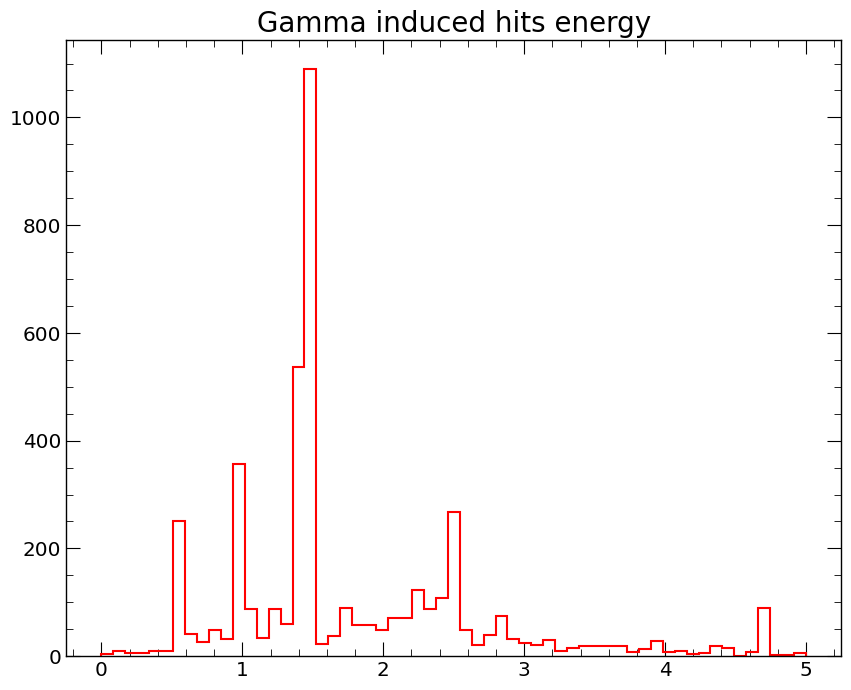

In [18]:
binning = np.linspace(0.,5.,60)
plt.figure(figsize=(10,8),dpi=100)
plt.hist(E_pgamma_hit, bins = binning, histtype='step',color='red')
plt.title("Gamma induced hits energy",fontsize=20)
plt.show()

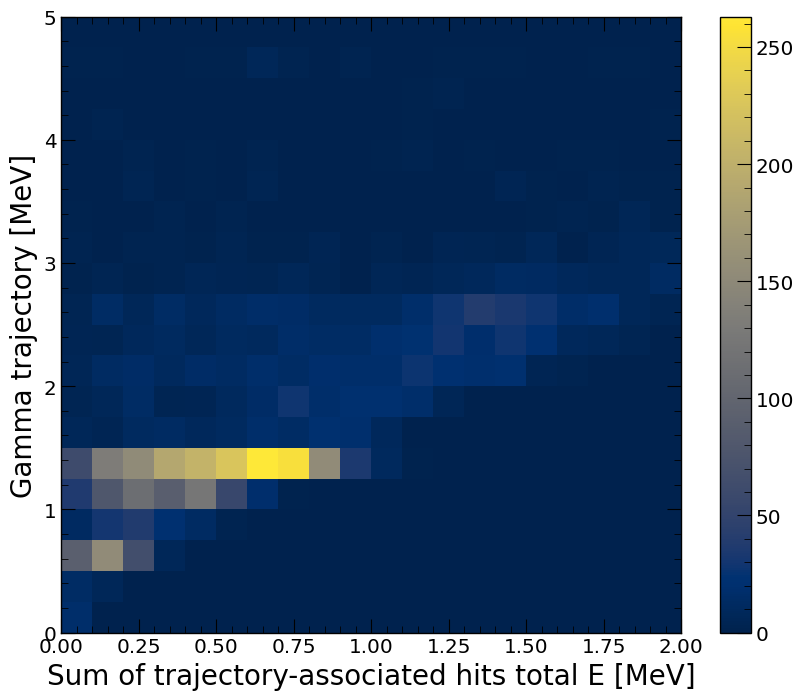

In [19]:
plt.figure(figsize=(10,8),dpi=100)
plt.hist2d(E_hit_sum,E_pgamma_hit,bins=20,range=[[0.,2.],[0.,5.]])
plt.colorbar()
plt.xlabel("Sum of trajectory-associated hits total E [MeV]",fontsize=20)
plt.ylabel("Gamma trajectory [MeV]",fontsize=20)
plt.show()

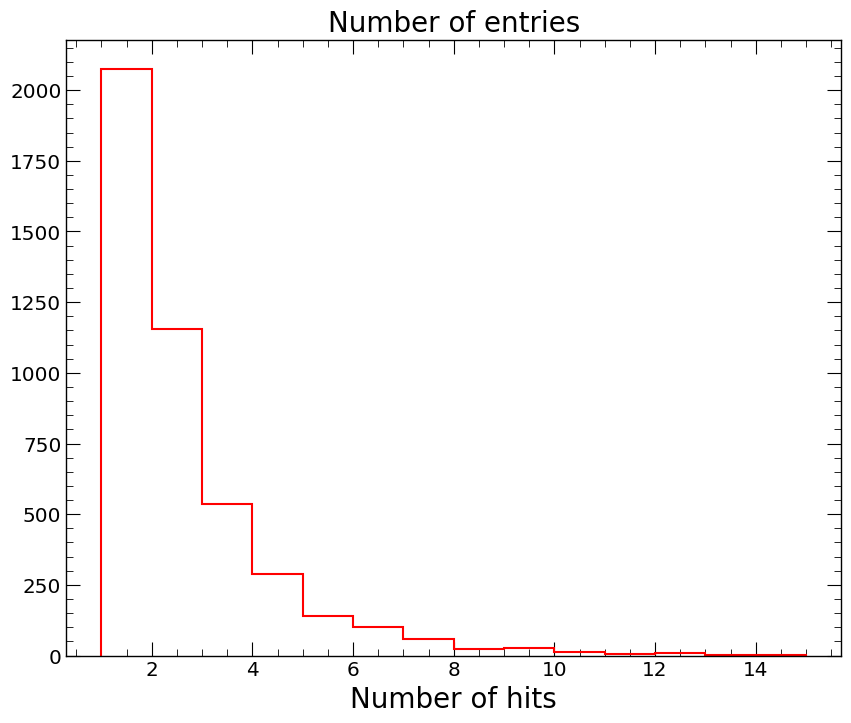

In [20]:
binning = np.linspace(1.,15.,15)
plt.figure(figsize=(10,8),dpi=100)
plt.hist(nhits_gamma, bins = binning, histtype='step',color='red')
plt.title("All gammas",fontsize=20)
plt.xlabel("Number of hits",fontsize=20)
plt.title("Number of entries",fontsize=20)
plt.show()

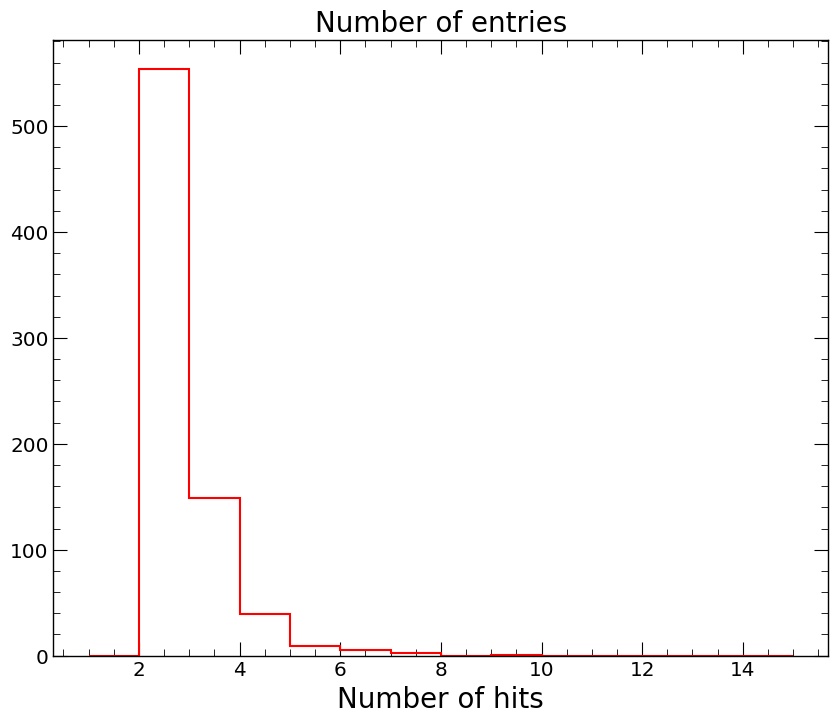

In [21]:
binning = np.linspace(1.,15.,15)
plt.figure(figsize=(10,8),dpi=100)
plt.hist(nhits_peak_gamma, bins = binning, histtype='step',color='red')
plt.title("All gammas",fontsize=20)
plt.xlabel("Number of hits",fontsize=20)
plt.title("Number of entries",fontsize=20)
plt.show()

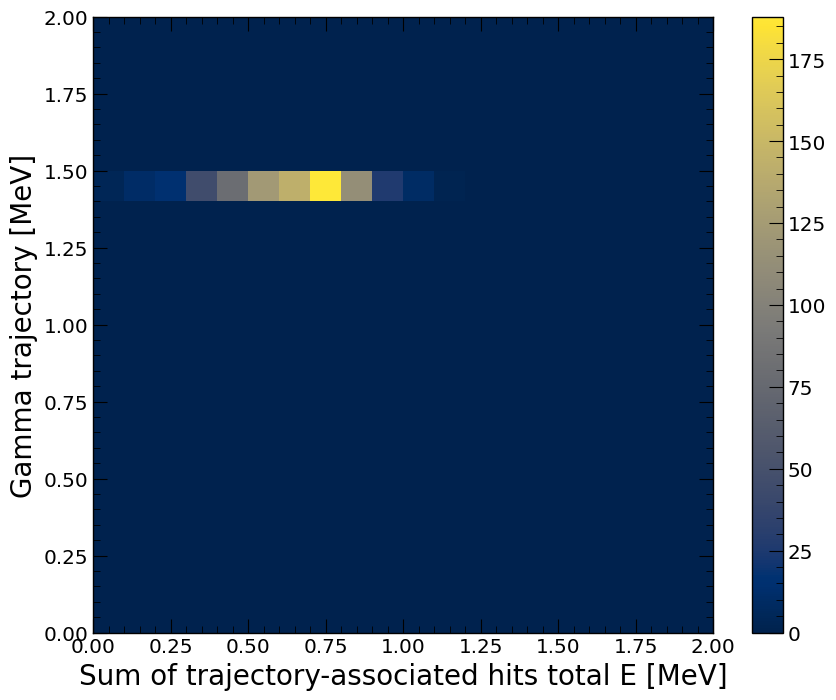

In [22]:
plt.figure(figsize=(10,8),dpi=100)
plt.hist2d(E_hit_sum_peak,E_pgamma_hit_peak,bins=20,range=[[0.,2.],[0.,2.]])
plt.colorbar()
plt.xlabel("Sum of trajectory-associated hits total E [MeV]",fontsize=20)
plt.ylabel("Gamma trajectory [MeV]",fontsize=20)
plt.show()

Mean: 0.27090594837955706


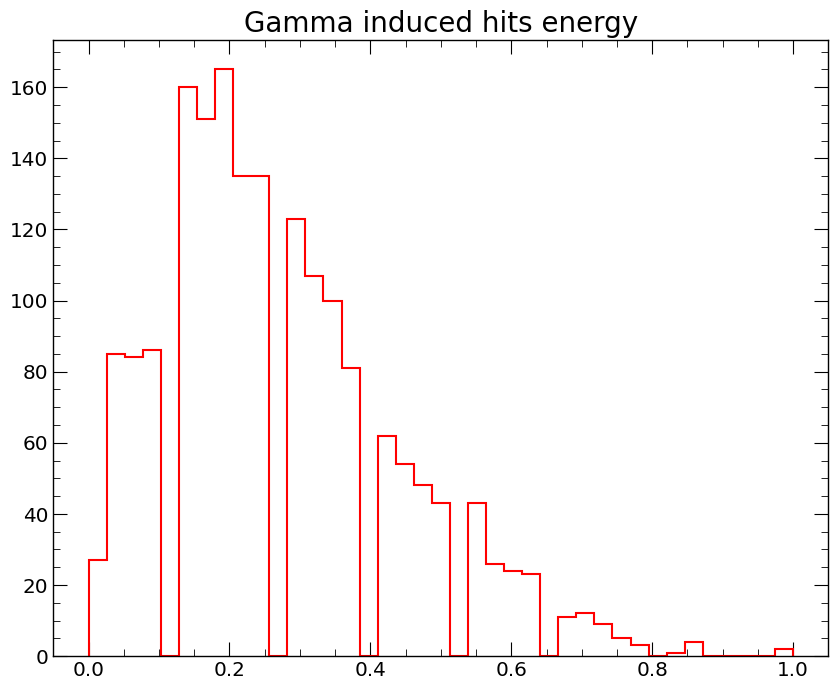

In [27]:
print(f"Mean: {np.mean(E_hit_peak)}")
binning = np.linspace(0.,1.,40)
plt.figure(figsize=(10,8),dpi=100)
plt.hist(E_hit_peak, bins = binning, histtype='step',color='red')
plt.title("Gamma induced hits energy",fontsize=20)
plt.show()

In [24]:
thresh = 2

nhits_gamma = np.array(nhits_gamma)
E_hit_sum = np.array(E_hit_sum)
E_pgamma_hit = np.array(E_pgamma_hit)

E_hit_sum = E_hit_sum[(nhits_gamma > 1 ) & (nhits_gamma <= 3 )]
E_pgamma_hit = E_pgamma_hit[(nhits_gamma > 1) & (nhits_gamma <= 3 )]

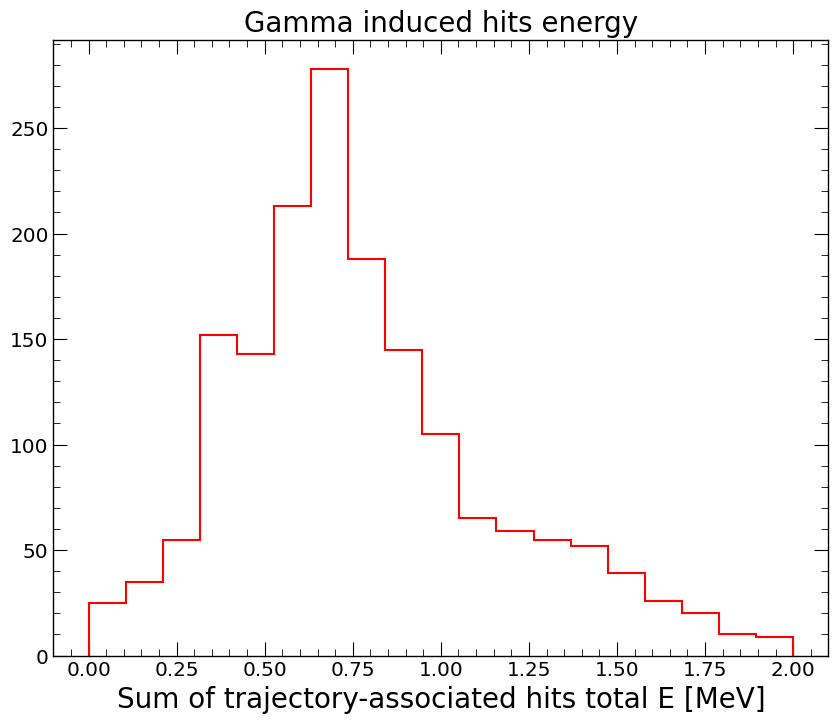

In [25]:
binning = np.linspace(0.,2.,20)
plt.figure(figsize=(10,8),dpi=100)
plt.hist(E_hit_sum, bins = binning, histtype='step',color='red')
plt.title("Gamma induced hits energy",fontsize=20)
plt.xlabel("Sum of trajectory-associated hits total E [MeV]",fontsize=20)
plt.show()

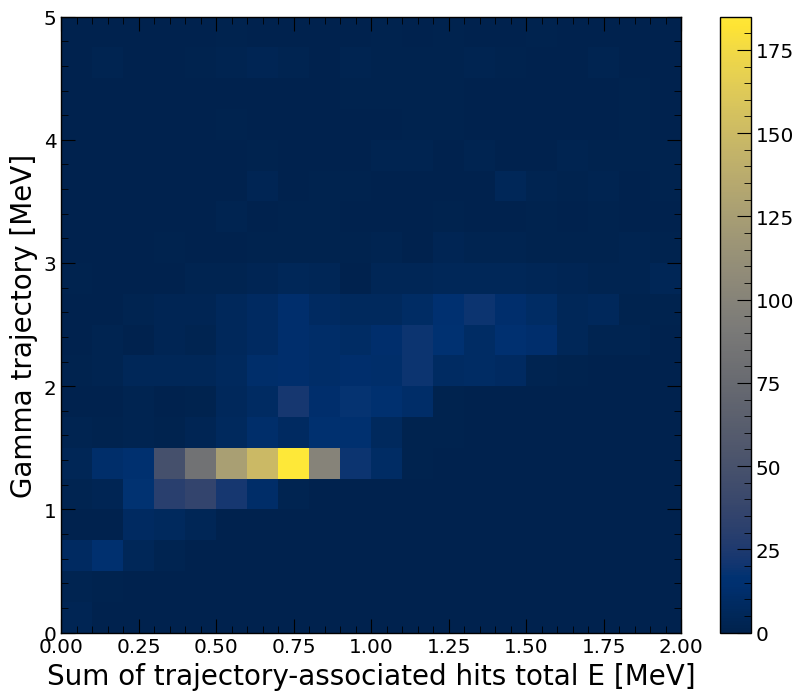

In [26]:
plt.figure(figsize=(10,8),dpi=100)
plt.hist2d(E_hit_sum,E_pgamma_hit,bins=20,range=[[0.,2.],[0.,5.]])
plt.colorbar()
plt.xlabel("Sum of trajectory-associated hits total E [MeV]",fontsize=20)
plt.ylabel("Gamma trajectory [MeV]",fontsize=20)
plt.show()